In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import lcdb
exp3df = pd.read_csv('experiment3.csv')

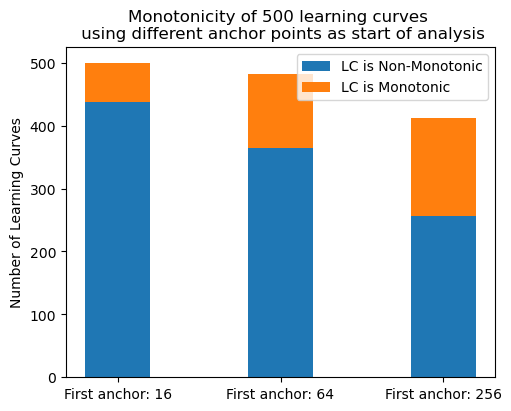

In [151]:
true = exp3df[exp3df['is_nonmonotonic'] == True]['is_nonmonotonic'].count()
false = exp3df[exp3df['is_nonmonotonic'] == False]['is_nonmonotonic'].count()
true2 = exp3df[exp3df['is_nonmonotonic64'] == True]['is_nonmonotonic64'].count()
false2 = exp3df[exp3df['is_nonmonotonic64'] == False]['is_nonmonotonic64'].count()
true3 = exp3df[exp3df['is_nonmonotonic256'] == True]['is_nonmonotonic256'].count()
false3 = exp3df[exp3df['is_nonmonotonic256'] == False]['is_nonmonotonic256'].count()

fig, ax = plt.subplots(layout='constrained',figsize=(5,4))
columns = ['First anchor: 16', 'First anchor: 64', 'First anchor: 256']
plt.bar(columns, [true, true2, true3], label='LC is Non-Monotonic', width=0.4)
plt.bar(columns, [false, false2, false3], bottom=[true, true2, true3], label='LC is Monotonic', width=0.4)

# Set labels and title
# plt.xlabel('Monotonicity ')
plt.ylabel('Number of Learning Curves')
plt.title('Monotonicity of 500 learning curves \n using different anchor points as start of analysis')

# Show the legend
plt.legend()

# Show the plot
plt.savefig('plots/monotonicity-aggregated-1.png')
plt.show()


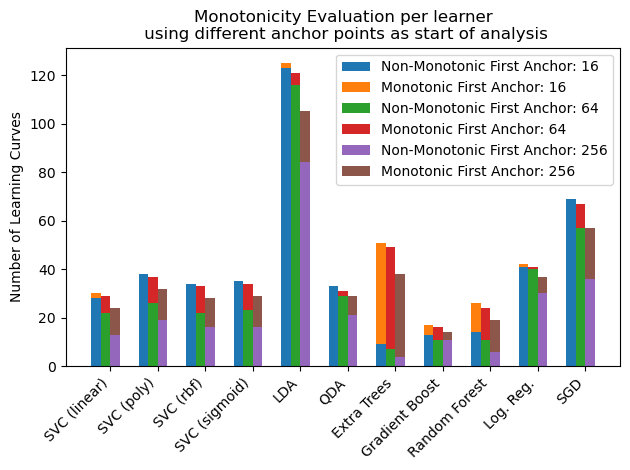

In [34]:
fig, ax = plt.subplots(layout='tight')

columns_of_interest = ['is_nonmonotonic', 'is_nonmonotonic64', 'is_nonmonotonic256']
columns = ['Monotonic First Anchor: 16', 'Monotonic First Anchor: 64', 'Monotonic First Anchor: 256']

grouped = exp3df.groupby('learner')[columns_of_interest].apply(lambda x: x.apply(pd.value_counts)).unstack().fillna(0)

bar_width = 0.2

x = np.arange(len(grouped))
for i, column in enumerate(columns_of_interest):
    plt.bar(x + (i * bar_width), grouped[column][True], width=bar_width, label=f'Non-{columns[i]}')
    plt.bar(x + (i * bar_width), grouped[column][False], width=bar_width, label=f'{columns[i]}',
            bottom=grouped[column][True])

learners_short = ['SVC (linear)', 'SVC (poly)','SVC (rbf)', 'SVC (sigmoid)', 'LDA', 'QDA', 'Extra Trees', 'Gradient Boost', 'Random Forest', 'Log. Reg.', 'SGD']
xticklabels = grouped.index
xticks = [i + (len(columns_of_interest) * bar_width / 2) for i in x]
plt.xticks(xticks, learners_short, rotation=45, ha="right")

plt.ylabel('Number of Learning Curves')
plt.title('Monotonicity Evaluation per learner\n using different anchor points as start of analysis')
plt.legend()

plt.savefig('plots/monotonicity-aggregation-2.png')
plt.show()

In [146]:
# print(learners)
print()

first16_true = []
first16_false = []

first64_true = []
first64_false = []

first256_true = []
first256_false = []

for lern in learners:
    curr = exp3df[exp3df['learner'] == lern]
    first16_true.append(curr[curr['is_nonmonotonic'] == True]['is_nonmonotonic'].count())
    first16_false.append(curr[curr['is_nonmonotonic'] == False]['is_nonmonotonic'].count())
    first64_true.append(curr[curr['is_nonmonotonic64'] == True]['is_nonmonotonic64'].count())
    first64_false.append(curr[curr['is_nonmonotonic64'] == False]['is_nonmonotonic64'].count())
    first256_true.append(curr[curr['is_nonmonotonic256'] == True]['is_nonmonotonic256'].count())
    first256_false.append(curr[curr['is_nonmonotonic256'] == False]['is_nonmonotonic256'].count())
    
for idx, lern in enumerate(learners):
    print(lern)
    print(f"\t non-monotone 16: {first16_true[idx]}")
    print(f"\t monotone 16: {first16_false[idx]}")
    print(f"\t non-monotone 64: {first64_true[idx]}")
    print(f"\t monotone 64: {first64_false[idx]}")
    print(f"\t non-monotone 256: {first256_true[idx]}")
    print(f"\t monotone 256: {first256_false[idx]}")


sklearn.discriminant_analysis.LinearDiscriminantAnalysis
	 non-monotone 16: 123
	 monotone 16: 2
	 non-monotone 64: 116
	 monotone 64: 5
	 non-monotone 256: 84
	 monotone 256: 21
sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis
	 non-monotone 16: 33
	 monotone 16: 0
	 non-monotone 64: 29
	 monotone 64: 2
	 non-monotone 256: 21
	 monotone 256: 8
sklearn.linear_model.SGDClassifier
	 non-monotone 16: 69
	 monotone 16: 0
	 non-monotone 64: 57
	 monotone 64: 10
	 non-monotone 256: 36
	 monotone 256: 21
sklearn.ensemble.GradientBoostingClassifier
	 non-monotone 16: 13
	 monotone 16: 4
	 non-monotone 64: 11
	 monotone 64: 5
	 non-monotone 256: 11
	 monotone 256: 3
sklearn.linear_model.LogisticRegression
	 non-monotone 16: 41
	 monotone 16: 1
	 non-monotone 64: 40
	 monotone 64: 1
	 non-monotone 256: 30
	 monotone 256: 7
SVC_linear
	 non-monotone 16: 28
	 monotone 16: 2
	 non-monotone 64: 22
	 monotone 64: 7
	 non-monotone 256: 13
	 monotone 256: 11
SVC_poly
	 non-monotone 16: 38
	

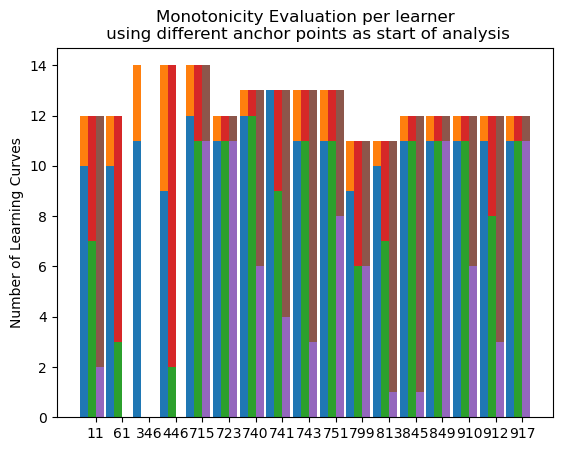

In [35]:
fig, ax = plt.subplots()
value_counts = exp3df['openmlid'].value_counts()
filtered = exp3df[exp3df['openmlid'].isin(value_counts.index[value_counts > 10])]

columns_of_interest = ['is_nonmonotonic', 'is_nonmonotonic64', 'is_nonmonotonic256']
columns = ['Monotonic First Anchor: 16', 'Monotonic First Anchor: 64', 'Monotonic First Anchor: 256']

grouped = filtered.groupby('openmlid')[columns_of_interest].apply(lambda x: x.apply(pd.value_counts)).unstack().fillna(0)

bar_width = 0.3


x = np.arange(len(grouped))
for i, column in enumerate(columns_of_interest):
    plt.bar(x + (i * bar_width), grouped[column][True], width=bar_width, label=f'Non-{columns[i]}')
    plt.bar(x + (i * bar_width), grouped[column][False], width=bar_width, label=f'{columns[i]}',
            bottom=grouped[column][True])

learners_short = ['SVC (linear)', 'SVC (poly)','SVC (rbf)', 'SVC (sigmoid)', 'LDA', 'QDA', 'Extra Trees', 'Gradient Boost', 'Random Forest', 'Log. Reg.', 'SGD']
xticklabels = grouped.index
xticks = [i + (len(columns_of_interest) * bar_width / 2) for i in x]
plt.xticks(xticks, xticklabels)

plt.ylabel('Number of Learning Curves')
plt.title('Monotonicity Evaluation per learner\n using different anchor points as start of analysis')
# plt.legend()

plt.savefig('plots/monotonicity-aggregation-3.png')
plt.show()

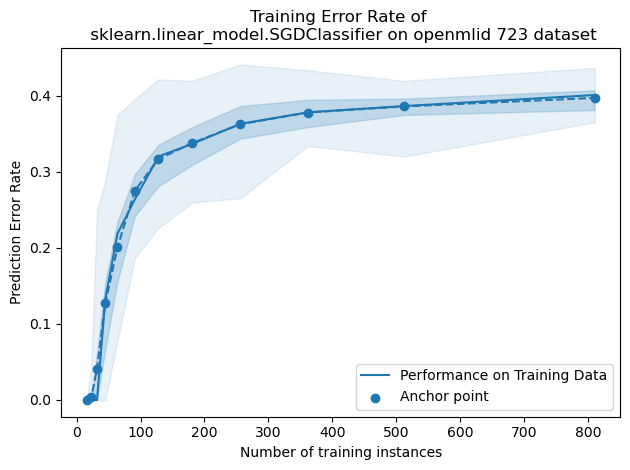

In [33]:
curve = lcdb.get_curve(723, 'sklearn.linear_model.SGDClassifier')
fig, ax = plt.subplots(layout='tight')

lcdb.plot_curve(curve[0], [[1 - x for x in a] for a in curve[1]], ax, "C0", label="Performance on Training Data") # train curve
# lcdb.plot_curve(curve[0], [[1 - x for x in a] for a in curve[2]], ax, "C1", label="Performance on Validation Data") # validation curve
# lcdb.plot_curve(curve[0], [[1 - x for x in a] for a in curve[3]], ax, "C2", label="Performance on Test Data") # test curve
plt.scatter(curve[0], [1 - np.mean(x) for x in curve[1]], label="Anchor point")
ax.legend(loc='lower right')
ax.set_xlabel("Number of training instances")
ax.set_ylabel("Prediction Error Rate")
plt.title("Training Error Rate of \n sklearn.linear_model.SGDClassifier on openmlid 723 dataset")
plt.savefig('plots/poster-introplot.png')
plt.show()